In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Restaurant_Reviews.csv')
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


## Data Exploration and Cleaning

In [3]:
cleaned_data = data.copy()


In [4]:
cleaned_data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
cleaned_data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [6]:
cleaned_data.isna().any()

Review    False
Liked     False
dtype: bool

In [7]:
cleaned_data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


From the sample of the dataset above, there are some symbols that need to be removed amongst other preprocessing. Let's write a pipeline that will take care of this.

In [8]:
import contractions
import re
from nltk.corpus import stopwords

stop_words = stopwords.words('english') 
stop_words.remove('not') # since "not" affects the sentiment of the review.

def fix_contractions(text):
    return contractions.fix(text)
    
def remove_punctuations(text):
    return re.sub('[^a-zA-Z]', ' ', text)

def convert_to_lower(text):
    return text.lower()
 
def remove_stopwords(text):
    return  ' '.join(word for word in text.split() if word not in stop_words) 

def preprocess(text):
    text = fix_contractions(text)
    text = remove_punctuations(text)
    text = convert_to_lower(text)
    text = remove_stopwords(text)
    return text

cleaned_data['Review'] = cleaned_data['Review'].apply(preprocess)

In [9]:
cleaned_data['Review']

0                                        wow loved place
1                                         crust not good
2                                not tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                            selection menu great prices
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997              overall not impressed would not go back
998    whole experience underwhelming think go ninja ...
999    not wasted enough life poured salt wound drawi...
Name: Review, Length: 1000, dtype: object

Now we'll need to convert our preprocessed text into usable features that can be processed by the selected algorithms.

## Feature Engineering

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [11]:
vectorized_data = vectorizer.fit_transform(cleaned_data['Review']).toarray() # sparse matrix to array
vectorized_data.shape

(1000, 1883)

In [12]:
vectorizer.vocabulary_

{'wow': 1863,
 'loved': 958,
 'place': 1225,
 'crust': 376,
 'not': 1101,
 'good': 699,
 'tasty': 1647,
 'texture': 1660,
 'nasty': 1076,
 'stopped': 1586,
 'late': 903,
 'may': 999,
 'bank': 102,
 'holiday': 790,
 'rick': 1381,
 'steve': 1578,
 'recommendation': 1338,
 'selection': 1452,
 'menu': 1021,
 'great': 713,
 'prices': 1269,
 'getting': 681,
 'angry': 34,
 'want': 1801,
 'damn': 387,
 'pho': 1211,
 'honeslty': 793,
 'taste': 1643,
 'fresh': 650,
 'potatoes': 1257,
 'like': 929,
 'rubber': 1398,
 'could': 345,
 'tell': 1652,
 'made': 973,
 'ahead': 16,
 'time': 1683,
 'kept': 881,
 'warmer': 1805,
 'fries': 656,
 'touch': 1705,
 'service': 1465,
 'prompt': 1281,
 'would': 1861,
 'go': 692,
 'back': 93,
 'cashier': 246,
 'care': 237,
 'ever': 545,
 'say': 1430,
 'still': 1580,
 'ended': 525,
 'wayyy': 1818,
 'overpriced': 1151,
 'tried': 1718,
 'cape': 233,
 'cod': 299,
 'ravoli': 1321,
 'chicken': 271,
 'cranberry': 361,
 'mmmm': 1044,
 'disgusted': 454,
 'pretty': 1266,
 'sur

In [13]:
vectorized_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model Creation and Evaluation

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectorized_data, cleaned_data['Liked'], test_size=0.2, random_state=42)

In [15]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

It can be seen that the input features are sparse matrices so let's convert them as such to save space.

In [16]:
import sys
from scipy.sparse import csr_matrix

sys.getsizeof(X_train)

12051328

In [17]:
sys.getsizeof(csr_matrix(X_train))

48

In [18]:
X_train = csr_matrix(X_train)
X_test = csr_matrix(X_test)

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score

svc = SVC()

svc.fit(X_train, y_train)

predictions = svc.predict(X_test)


In [20]:
precision_score(y_true=y_test,
                y_pred=predictions).round(3)

0.867

In [21]:
recall_score(y_true=y_test,
             y_pred=predictions).round(3)

0.75

Adjusting the threshold of the classifier will give you more control over the precision and recall values of the classifier.

### Visualizing the Threshold

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

decisions = cross_val_predict(estimator=svc,
                                X=X_train,
                                y=y_train,
                                cv=3,
                                method='decision_function')

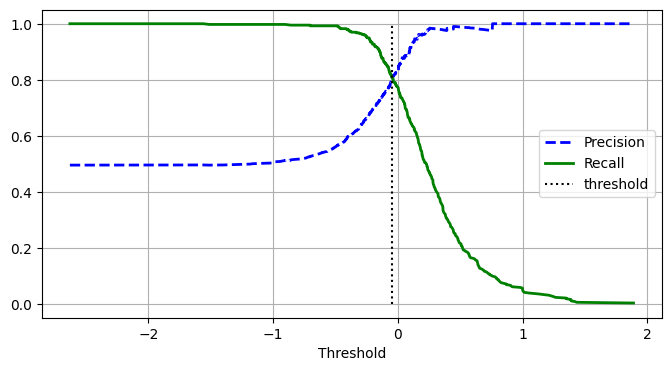

In [23]:
precisions, recalls, thresholds = precision_recall_curve(y_train, decisions)

threshold_index = (precisions >= recalls).argmax()
threshold = thresholds[threshold_index]

def plot_pr_comparison_curve(thresholds, precisions, recalls, threshold_value=0):
    
    plt.figure(figsize=(8, 4)) 
    plt.grid()
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.vlines(threshold_value, 0, 1.0, "k", "dotted", label="threshold")
    plt.xlabel("Threshold")
    plt.legend(loc="center right")
    
    plt.show()

plot_pr_comparison_curve(thresholds=thresholds,
              precisions=precisions,
              recalls=recalls,
              threshold_value = threshold)
              

Let's adjust the threshold to achieve a recall of about 90%.

In [24]:
recall_at_90_index = (recalls <= 0.9).argmax() # <= is used instead of >= since the recall values are in descending order.

recall_90_threshold = thresholds[recall_at_90_index]

In [25]:
decisions_at_90_recall = (decisions >= recall_90_threshold).astype(int)


recall_score(y_true=y_train,
             y_pred=decisions_at_90_recall).round(2)

0.9

In [26]:
precision_score(y_true=y_train,
                y_pred=decisions_at_90_recall).round(2)

0.73

We have succesfully adjusted our threshold to give us about 90% recall but at the cost of a reduced precision since there's a tradeoff between precision and recall, as can be noted from the plot above. But having a recall of about 90% and precision at about 70% is still quite good depending on the learning task.

We can also do the same for precision. Let's adjust the threshold to a precision of about 95%.

In [27]:
precision_at_95_index = (precisions >= 0.95).argmax()
precision_95_threshold = thresholds[precision_at_95_index]

In [28]:
decisions_at_95_precision = (decisions >= precision_95_threshold).astype(int)

precision_score(y_true=y_train,
                y_pred=decisions_at_95_precision).round(3)

0.952

In [29]:
recall_score(y_true=y_train,
                y_pred=decisions_at_95_precision).round(3)

0.596

Let's visualize this

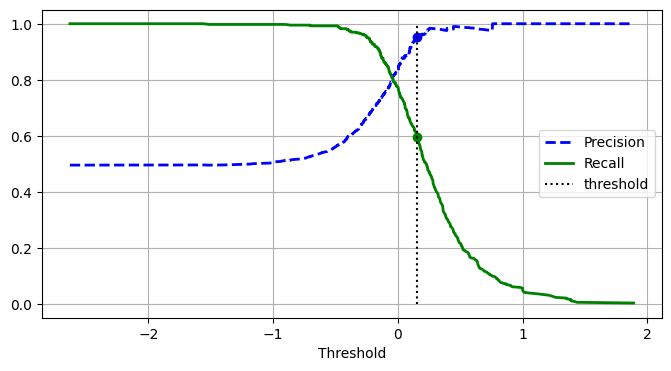

In [30]:
plt.figure(figsize=(8, 4)) 
plt.grid()
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(precision_95_threshold, precisions[precision_at_95_index], "bo")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.plot(precision_95_threshold, recalls[precision_at_95_index], "go")
plt.vlines(precision_95_threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

### Evaluation using Precision Recall Curve

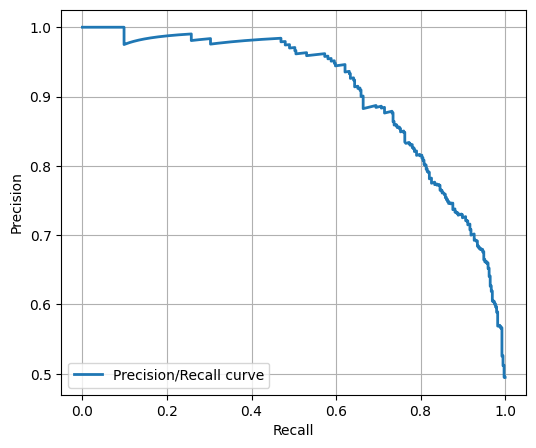

In [31]:
def plot_pr_curve(recalls, precisions):
    plt.figure(figsize=(6, 5))
    plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid()
    plt.legend(loc="lower left")
    plt.show()

plot_pr_curve(recalls=recalls,
              precisions=precisions)

From the plot above, it can be seen that there's room for improvement as the curve could be closer to the top-right corner.

### Evaluating Using the ROC Curve

In [32]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_train,
                                                               y_score=decisions)

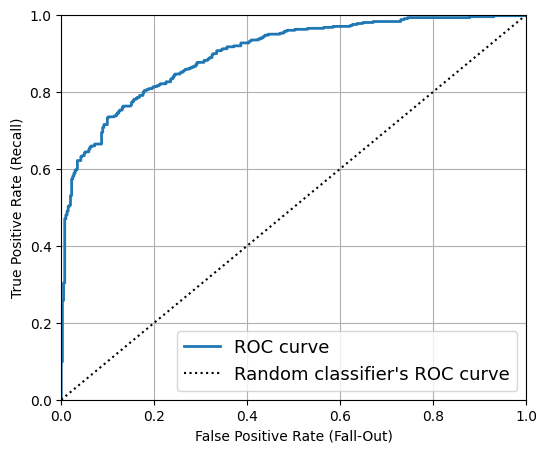

In [33]:
def plot_roc_curve(false_positive_rate, true_positive_rate):
    plt.figure(figsize=(6, 5))
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label="ROC curve")
    plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
    
    
    
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
    plt.axis([0, 1, 0, 1])
    plt.legend(loc="lower right", fontsize=13)
    
    plt.show()
    
plot_roc_curve(false_positive_rate=false_positive_rate,
               true_positive_rate=true_positive_rate)

From the PR-curve and the ROC curve above, it can be seen that the classifier has more room for improvement. Let's scale the features to see if there'll be an improvment.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False) # since we're dealing with a sparse matrix,
#subtracting the mean from the values will invalidate its sparsity.

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)
svc.fit(X_train_scaled, y_train)

predictions_scaled = svc.predict(X_test_scaled)

In [35]:
precision_score(y_true=y_test,
                y_pred=predictions_scaled).round(3)

0.71

In [36]:
recall_score(y_true=y_test,
             y_pred=predictions_scaled).round(3)

0.846

In [37]:
decisions_scaled = cross_val_predict(estimator=svc,
                                       X=X_train_scaled,
                                       y=y_train,
                                       cv=3,
                                       method='decision_function',
                                       verbose=3)

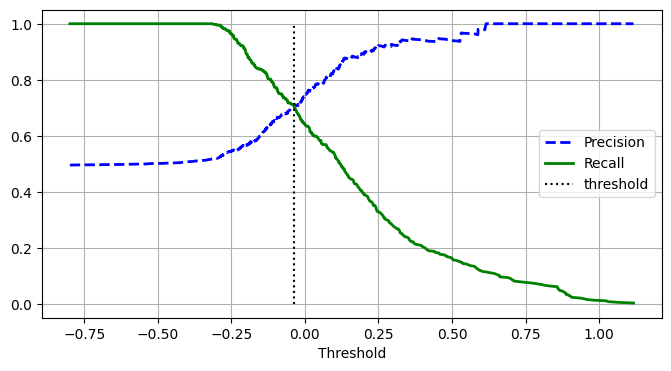

In [38]:
precisions_scaled, recalls_scaled, thresholds_scaled = precision_recall_curve(y_train, decisions_scaled)

threshold_index = (precisions_scaled >= recalls_scaled).argmax()
threshold = thresholds_scaled[threshold_index]

plot_pr_comparison_curve(thresholds=thresholds_scaled,
                         precisions=precisions_scaled,
                         recalls=recalls_scaled,
                         threshold_value=threshold)


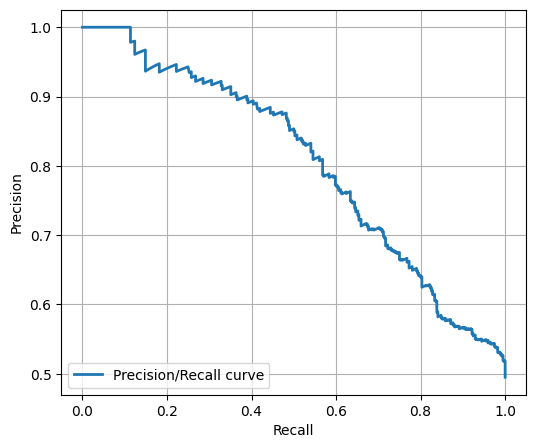

In [39]:
plot_pr_curve(precisions=precisions_scaled,
              recalls=recalls_scaled)

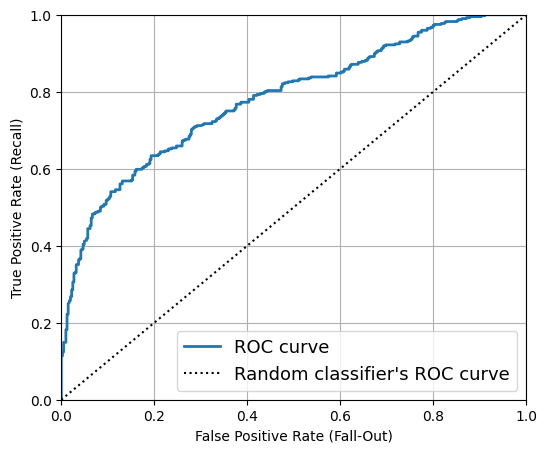

In [40]:
fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_train, decisions_scaled)

plot_roc_curve(false_positive_rate=fpr_scaled,
               true_positive_rate=tpr_scaled)

From the evaluations above, it can be seen that scaling the features is not a good idea.

In [41]:
# deleting all variables with _scaled attached to them.
for var_ in dir():
    if '_scaled' in var_:
        del globals()[var_]

Let's try another simple classifier.

In [42]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

log_predictions = log_clf.predict(X_test)

In [43]:
precision_score(y_true=y_test,
                y_pred=log_predictions).round(3)

0.874

In [44]:
recall_score(y_true=y_test,
             y_pred=log_predictions).round(3)

0.731

The logistic regression classifier has initial precision and recall which is better than the svm classifier. Let's plot its pr and roc curves.

In [45]:
log_decisions = cross_val_predict(estimator=log_clf,
                                  X=X_train,
                                  y=y_train,
                                  cv=3,
                                  method='decision_function')



log_precisions, log_recalls, log_thresholds = precision_recall_curve(y_train, log_decisions)

threshold_index = (log_precisions >= log_recalls).argmax()
threshold = log_thresholds[threshold_index]

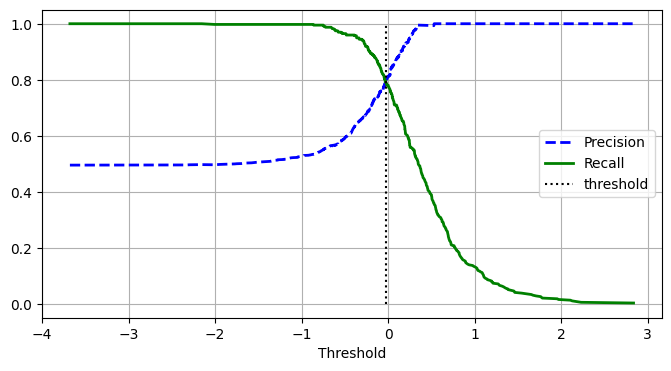

In [46]:
plot_pr_comparison_curve(precisions=log_precisions,
                         recalls=log_recalls,
                         thresholds=log_thresholds,
                         threshold_value=threshold)

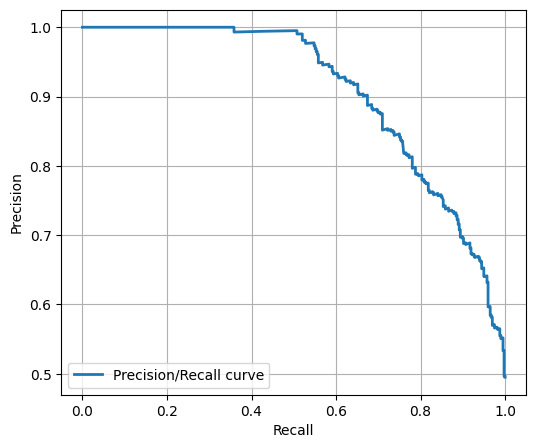

In [47]:
plot_pr_curve(precisions=log_precisions,
              recalls=log_recalls)

Let's compare the pr-curves of the svm and logistic regression classifiers.

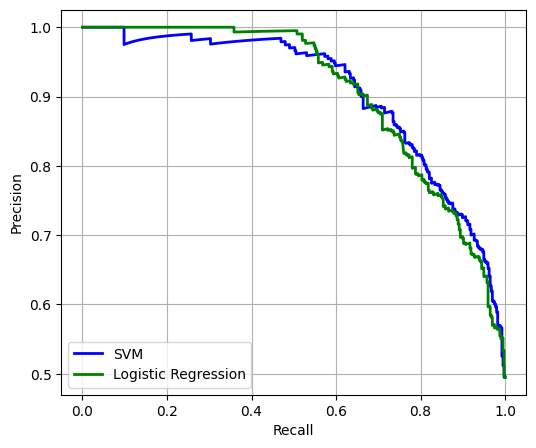

In [48]:
def compare_pr_curves(recalls_list, precisions_list, first_label, second_label):

    """ Compares two different pr-curve plots

    Parameters:

    recalls_list: list of arrays
                  A list of the arrays of the different recalls. Order must be 
                  taken into account.

    precisions_list: list of arrays
                     A list of the arrays of the different precisions. Order must
                     be taken into account.

    first_label: string
                 The label of the first plot.

    second_label: string
                  The label of the second plot.
                  
    
    """
    plt.figure(figsize=(6, 5))
    plt.plot(recalls_list[0], precisions_list[0], "b-", linewidth=2, label=first_label)
    plt.plot(recalls_list[1], precisions_list[1], "g-",linewidth=2, label=second_label)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid()
    plt.legend(loc="lower left")
    plt.show()

compare_pr_curves(recalls_list=[recalls, log_recalls],
                  precisions_list=[precisions, log_precisions],
                  first_label="SVM",
                  second_label="Logistic Regression")

It is again shown that the svm classifier is performing slightly better than the logistic regression classifier.

Let's make use of more complex models next.

### Complex Models

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, )

rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
rf_y_pred = rf_clf.predict(X_test)

precision_score(y_true=y_test,
                y_pred=rf_y_pred).round(3)

0.917

In [51]:
recall_score(y_true=y_test,
             y_pred=rf_y_pred).round(3)

0.635

The random forest classifier gives a very high precision but at the cost of the recall. Let's observe how it's precision and recall relate and adjust its threshold value accordingly to increase its recall a bit.

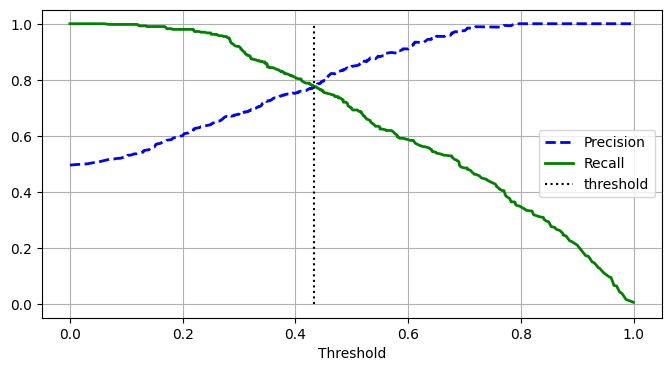

In [52]:
rf_probs = cross_val_predict(estimator=rf_clf,
                                 X=X_train,
                                 y=y_train,
                                 cv=3,
                                 method='predict_proba')

rf_y_scores = rf_probs[:,1]

rf_precisions, rf_recalls, rf_thresholds = precision_recall_curve(y_train, rf_y_scores)

threshold_index = (rf_precisions >= rf_recalls).argmax()
threshold = rf_thresholds[threshold_index]

plot_pr_comparison_curve(precisions=rf_precisions,
                         recalls=rf_recalls,
                         thresholds=rf_thresholds,
                         threshold_value = threshold)

Let's shift this threshold slightly to left and analyze the results on the test set.

In [53]:
threshold -=0.1

In [54]:
new_rf_y_pred = (rf_clf.predict_proba(X_test)[:,1] >= threshold).astype(int)

In [55]:
precision_score(y_true=y_test,
                y_pred=new_rf_y_pred).round(3)
                

0.8

In [56]:
recall_score(y_true=y_test,
             y_pred=new_rf_y_pred).round(3)

0.846

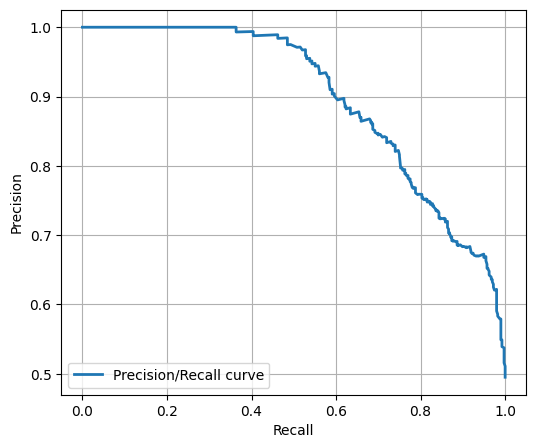

In [57]:
plot_pr_curve(recalls=rf_recalls,
              precisions=rf_precisions)

Now let's compare it with the svm classifier.

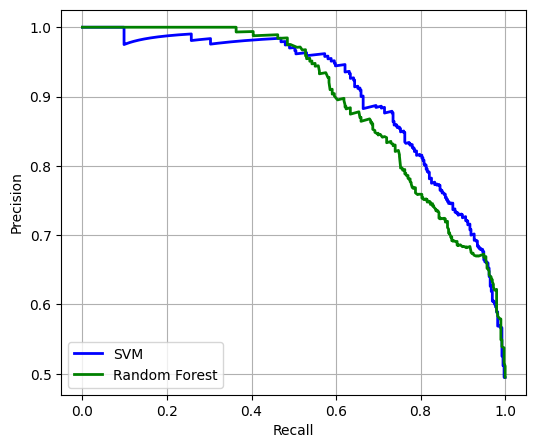

In [58]:
compare_pr_curves(recalls_list=[recalls, rf_recalls],
                  precisions_list=[precisions, rf_precisions],
                  first_label="SVM",
                  second_label="Random Forest")

From above it can be seen that the svm classifier does generally better than the random forest classifier.

Let's try another ensemble and see how it performs compared to the svm classifier.

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [60]:
gbm_probs = cross_val_predict(estimator=gbm,
                              X=X_train,
                              y=y_train,
                              cv=3,
                              method='predict_proba')

In [61]:
gbm_y_prob = gbm_probs[:,1]


gbm_precisions, gbm_recalls, gbm_thresholds = precision_recall_curve(y_true=y_train,
                                                                     probas_pred=gbm_y_prob)

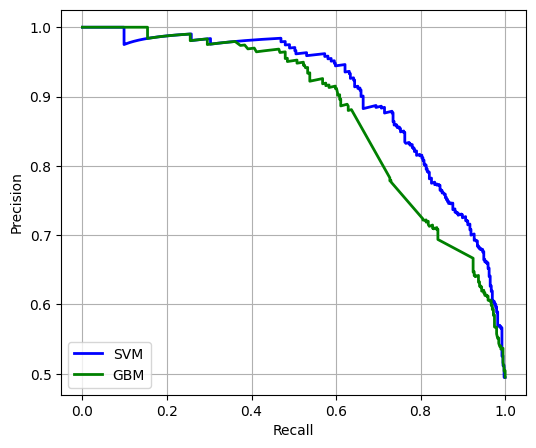

In [62]:
compare_pr_curves(recalls_list=[recalls, gbm_recalls],
                  precisions_list=[precisions, gbm_precisions],
                  first_label="SVM",
                  second_label="GBM")

Since the svm classifier is performing better than all the models, it will be our model of choice.

### Error Analysis.

Now let's try and find out some of the mistakes our selected model makes and try to fix it to get better results. We'll do this by using a confusion matrix.

In [63]:
y_train_pred = cross_val_predict(estimator=SVC(),
                                 X=X_train,
                                 y=y_train,
                                 cv=3,
                                 method='predict')

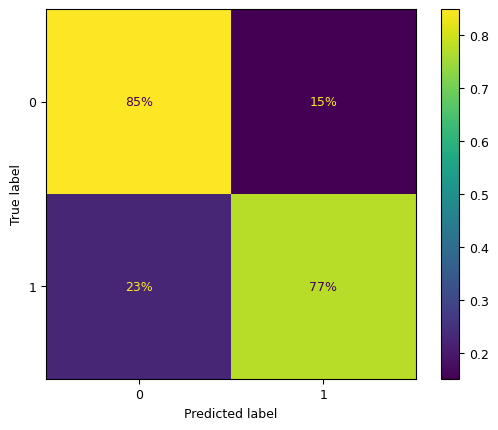

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9) 
ConfusionMatrixDisplay.from_predictions(y_true=y_train,
                                        y_pred=y_train_pred,
                                        normalize="true",
                                        values_format=".0%")
plt.show()

From above it can be seen that our chosen classifier has a false negative rate of 15% and a false positive rate of 23%. The model is thus misclassifying some positive reviews. Let's see the examples it's misclassifying.

In [65]:
false_positives = ((y_train==1) & (y_train_pred == 0)).astype(int)
index = np.argwhere(false_positives == 1).flatten()
false_positive_idx = y_train.iloc[index].index

In [66]:
for review in cleaned_data['Review'].iloc[false_positive_idx].head(10):
    print(review)

get inside impressed place
point finger item menu order not disappointed
back many times soon
folks otto always make us feel welcome special
everyone treated equally special
not small family restaurant fine dining establishment
would recommend saving room
not disappointed
nice blanket moz top feel like done cover subpar food
restaurant always full never wait


In [67]:
cleaned_data['Review'].iloc[false_positive_idx].str.contains('n|t')

799    True
519    True
490    True
227    True
352    True
       ... 
769    True
661    True
214    True
71     True
270    True
Name: Review, Length: 90, dtype: bool

It can be seen that classifier is mapping the reviews containing both "n" or "t" to negative instead of positive. Meaning that the classifier is mapping any review containing any negatives to the negative class. One way this can be fixed is by getting more examples containing such letters but correctly mapped to a positive review. We can also tune our model hyperparameters and evaluate it's performance on the errors noticed.

### Model Tuning

Now let's tune our model by making a grid search over some of it's hyperparameters. 

In [68]:
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV

chosen_model = SVC()

param_grid = dict(C = np.linspace(start=0.1, stop=1.0, num=10),
                  kernel = ["poly", "rbf", "sigmoid"],
                  gamma = ["scale", "auto"])


grid_search = GridSearchCV(estimator=chosen_model,
                           param_grid=param_grid,
                           scoring="f1",
                           cv=3)
grid_search.fit(X_train, y_train)                  

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='f1')

Now let's evaluate our best estimator's performance.

In [69]:
best_svm = grid_search.best_estimator_

best_svm.fit(X_train, y_train)

best_predictions = best_svm.predict(X_test)

In [70]:
precision_score(y_true=y_test,
                y_pred=best_predictions).round(3)

0.879

In [71]:
recall_score(y_true=y_test,
                y_pred=best_predictions).round(3)

0.769

Let's check the accuracy of our tuned model

In [72]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_test,
               y_pred=best_predictions).round(3)


0.825

Now let's compare the performance of our tuned model on the confusion matrix to the one attained during the error analysis.

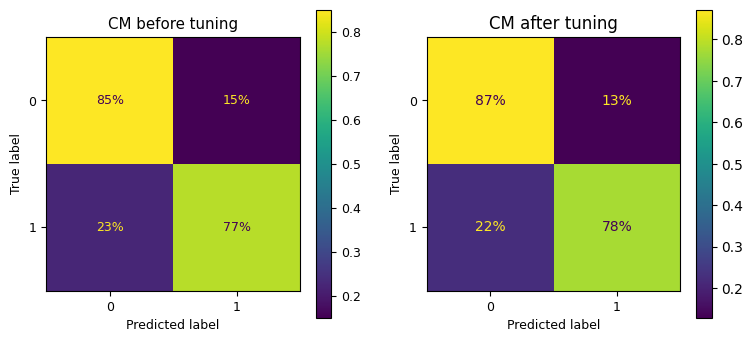

In [73]:
best_y_train_pred = cross_val_predict(estimator=best_svm,
                                 X=X_train,
                                 y=y_train,
                                 cv=3,
                                 method='predict')


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_true=y_train,
                                        y_pred=y_train_pred,
                                        ax=axs[0],
                                        normalize='true',
                                        values_format=".0%")
axs[0].set_title("CM before tuning")

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true=y_train,
                                        y_pred=best_y_train_pred,
                                        ax=axs[1],
                                        normalize="true",
                                        values_format=".0%")
axs[1].set_title("CM after tuning")


plt.show()

It can be seen above that our tuned model is now doing better in correctly predicting our positive class. It improved from 77% to 78%.
It also improved in predicting the negative class, moving from 85% to 87%.

Now let's save the model in case we would want to use it later for a similar case. We wouldn't have to retrain the model again.

### Model Serialization

In [74]:
import joblib
  
saved_model = best_svm
file_name = 'Restaurant_Review_SVM.pkl'

joblib.dump(saved_model, file_name) 

['Restaurant_Review_SVM.pkl']